# Darksky Cleaner

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
from scipy import stats
import scipy
import math
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
import datetime

import seaborn as sns
# sns.set()
sns.set_style('whitegrid')
sns.set_context("poster")

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [3]:
day_labels = ['MON','TUE','WED','THU','FRI','SAT','SUN']
day_labels_full = ['MONDAY','TUESDAY','WEDNESDAY','THURSDAY','FRIDAY','SATURDAY','SUNDAY']
month_labels = ['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']

ordered_zipcodes = [94107, 95113, 94041, 94301, 94063]

In [4]:
def zip_to_landmark(zip_code):
    ''' Return zipcode for given landmark'''
    if zip_code == 94107:
        return 'San Francisco'
    if zip_code == 94063:
        return 'Redwood City'
    if zip_code == 94301:
        return 'Palo Alto'
    if zip_code == 94041:
        return 'Mountain View'
    if zip_code == 95113:
        return 'San Jose'
    return False

# Load Station Data For Identification
<p>Cross reference cleaned station data to assign `station_id` column to each record</p>

In [5]:
stations = pd.read_csv('../clean_data/bayareabikeshare/station_data_cleaned.csv', index_col=0, parse_dates=['first_service_date', 'last_service_date'])
stations = stations[['station_id', 'lat', 'long', 'zip_code', 'region']].copy()
stations.head()

,station_id,lat,long,zip_code,region
0,2,37.329732,-121.901782,95113,San Jose
1,3,37.330698,-121.888979,95113,San Jose
2,4,37.333988,-121.894902,95113,San Jose
3,5,37.331415,-121.893200,95113,San Jose
4,6,37.336721,-121.894074,95113,San Jose


# Load DarkSky Data

In [6]:
print('Started Loading Weather Data...')
file_path_slug = '../source_data/darksky/*.csv'
file_list = glob(file_path_slug)

weather_df = pd.DataFrame()

num_files = len(file_list)
chunks = []

for i, file in enumerate(file_list):

    chunk = pd.read_csv(file, index_col=0, parse_dates=['time_corrected'])
    
    
    chunks.append(chunk)
    
    if (i + 1) == 1 or (i + 1) % math.ceil(num_files/10) == 0 or (i + 1) == num_files:
        print('\t[%s] finished chunk %s of %s' % (datetime.datetime.now().time(), str(i+1).rjust(8), str(num_files).rjust(8)))

    
weather_df = pd.concat(chunks)

weather_df.drop_duplicates(inplace=True)
weather_df.reset_index(inplace=True, drop=True)

print('Data Loaded Successfully!')

Started Loading Weather Data...
	[16:22:08.060840] finished chunk        1 of    66114
	[16:22:34.991455] finished chunk     6612 of    66114
	[16:23:00.069270] finished chunk    13224 of    66114
	[16:23:24.700365] finished chunk    19836 of    66114
	[16:23:48.491190] finished chunk    26448 of    66114
	[16:24:12.945746] finished chunk    33060 of    66114
	[16:24:37.590340] finished chunk    39672 of    66114
	[16:25:01.786672] finished chunk    46284 of    66114
	[16:25:26.709708] finished chunk    52896 of    66114
	[16:25:50.884513] finished chunk    59508 of    66114
	[16:26:15.147210] finished chunk    66114 of    66114
Data Loaded Successfully!


In [7]:
weather_df.head()

,apparentTemperature,cloudCover,daily_icon,daily_summary,dewPoint,hourly_icon,hourly_summary,humidity,latitude,longitude,...,precipIntensity,precipProbability,precipType,pressure,temperature,time,time_corrected,visibility,windBearing,windSpeed
0,53.93,0.31,rain,"Heavy rain starting overnight, continuing unti...",50.44,partly-cloudy-night,Partly Cloudy,0.88,37.795392,-122.394203,...,0.0059,0.59,rain,1012.43,53.93,1418716800,2014-12-16 00:00:00,9.29,131.0,10.26
1,54.72,NaN,rain,"Heavy rain starting overnight, continuing unti...",50.83,clear-night,Clear,0.87,37.795392,-122.394203,...,0.0059,0.59,rain,1012.13,54.72,1418720400,2014-12-16 01:00:00,8.41,146.0,8.84
2,53.94,NaN,rain,"Heavy rain starting overnight, continuing unti...",50.07,clear-night,Clear,0.87,37.795392,-122.394203,...,0.0112,0.85,rain,1012.32,53.94,1418724000,2014-12-16 02:00:00,8.11,149.0,8.02
3,53.86,0.31,rain,"Heavy rain starting overnight, continuing unti...",51.22,rain,Rain,0.91,37.795392,-122.394203,...,0.1668,0.85,rain,1012.71,53.86,1418727600,2014-12-16 03:00:00,8.29,149.0,7.16
4,53.78,0.75,rain,"Heavy rain starting overnight, continuing unti...",51.19,rain,Rain,0.91,37.795392,-122.394203,...,0.1323,0.85,rain,1012.64,53.78,1418731200,2014-12-16 04:00:00,9.47,129.0,9.66


In [8]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586743 entries, 0 to 1586742
Data columns (total 21 columns):
apparentTemperature    1586743 non-null float64
cloudCover             1363580 non-null float64
daily_icon             1586743 non-null object
daily_summary          1586743 non-null object
dewPoint               1586743 non-null float64
hourly_icon            1586743 non-null object
hourly_summary         1586743 non-null object
humidity               1586743 non-null float64
latitude               1586743 non-null float64
longitude              1586743 non-null float64
offset                 1586743 non-null int64
precipIntensity        1586743 non-null float64
precipProbability      1586743 non-null float64
precipType             88330 non-null object
pressure               1586743 non-null float64
temperature            1586743 non-null float64
time                   1586743 non-null int64
time_corrected         1586743 non-null datetime64[ns]
visibility             1586

In [25]:
weather = weather_df.merge(stations, left_on=['latitude', 'longitude'], right_on=['lat', 'long'], how='left')

array([50, 23, 28, 69, 71, 54, 68,  8, 75, 73, 42, 32, 41, 80,  2, 14, 39,
       57, 61, 65, 77, 13, 30, 70, 25,  4,  5, 84, 33, 27, 55, 63, 29, 51,
       31, 66, 49,  3, 47, 67, 11, 82, 34, 56, 59, 26, 37, 35, 12, 45,  7,
       10, 64,  6, 72, 74, 16,  9, 48, 36, 58, 22, 62, 46, 76, 21, 38, 60,
       83, 24, 91, 89, 90, 88])

## Encode 'precipType'
<ul>
    <li>rain -> 1</li>
    <li>nan -> 0</li>
</ul>

In [28]:
try:
    weather.precipType.fillna(0, inplace=True)
    weather.precipType = weather.precipType.apply(lambda x: 0 if x == 0 else 1)
except:
    pass

In [29]:
weather.describe()

,apparentTemperature,cloudCover,dewPoint,humidity,latitude,longitude,offset,precipIntensity,precipProbability,precipType,pressure,temperature,time,visibility,windBearing,windSpeed,station_id,lat,long,zip_code
count,1.586743e+06,1.363580e+06,1.586743e+06,1.586743e+06,1.586743e+06,1.586743e+06,1.586743e+06,1.586743e+06,1.586743e+06,1.586743e+06,1.586743e+06,1.586743e+06,1.586743e+06,1.586743e+06,1.586186e+06,1.586314e+06,1.586743e+06,1.586743e+06,1.586743e+06,1.586743e+06
mean,5.926332e+01,1.512079e-01,4.948934e+01,7.186864e-01,3.762201e+01,-1.222428e+02,-7.332466e+00,1.299324e-03,2.583651e-02,5.566749e-02,1.016222e+03,5.936134e+01,1.424951e+09,9.153926e+00,2.411017e+02,5.830687e+00,4.553355e+01,3.762201e+01,-1.222428e+02,9.431503e+04
std,7.598377e+00,1.818528e-01,6.731419e+00,1.550477e-01,2.023085e-01,2.081051e-01,4.710971e-01,1.098214e-02,1.329410e-01,2.292786e-01,4.596603e+00,7.391343e+00,2.718139e+07,1.152798e+00,8.541428e+01,3.604809e+00,2.359421e+01,2.023085e-01,2.081051e-01,4.087736e+02
min,2.589000e+01,0.000000e+00,7.270000e+00,1.200000e-01,3.732973e+01,-1.224190e+02,-8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.936100e+02,2.978000e+01,1.377760e+09,2.300000e-01,0.000000e+00,0.000000e+00,2.000000e+00,3.732973e+01,-1.224190e+02,9.404100e+04
25%,5.462000e+01,0.000000e+00,4.631000e+01,6.200000e-01,3.739436e+01,-1.224027e+02,-8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.013060e+03,5.462000e+01,1.401635e+09,8.890000e+00,2.050000e+02,3.030000e+00,2.800000e+01,3.739436e+01,-1.224027e+02,9.410700e+04
50%,5.882000e+01,1.200000e-01,5.042000e+01,7.500000e-01,3.777865e+01,-1.223942e+02,-7.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.015750e+03,5.882000e+01,1.424938e+09,9.530000e+00,2.630000e+02,5.260000e+00,4.900000e+01,3.777865e+01,-1.223942e+02,9.410700e+04
75%,6.340000e+01,2.400000e-01,5.435000e+01,8.400000e-01,3.778963e+01,-1.220819e+02,-7.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.019190e+03,6.339000e+01,1.447772e+09,9.880000e+00,3.030000e+02,7.950000e+00,6.600000e+01,3.778963e+01,-1.220819e+02,9.430100e+04
max,9.661000e+01,1.000000e+00,6.560000e+01,1.000000e+00,3.780477e+01,-1.218773e+02,-7.000000e+00,6.281000e-01,1.000000e+00,1.000000e+00,1.031960e+03,9.661000e+01,1.472710e+09,1.000000e+01,3.590000e+02,4.071000e+01,9.100000e+01,3.780477e+01,-1.218773e+02,9.511300e+04


In [41]:
weather.drop(['latitude', 'longitude'], axis=1, inplace=True)
weather.fillna(0, inplace=True)
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1586743 entries, 0 to 1586742
Data columns (total 24 columns):
apparentTemperature    1586743 non-null float64
cloudCover             1586743 non-null float64
daily_icon             1586743 non-null object
daily_summary          1586743 non-null object
dewPoint               1586743 non-null float64
hourly_icon            1586743 non-null object
hourly_summary         1586743 non-null object
humidity               1586743 non-null float64
offset                 1586743 non-null int64
precipIntensity        1586743 non-null float64
precipProbability      1586743 non-null float64
precipType             1586743 non-null int64
pressure               1586743 non-null float64
temperature            1586743 non-null float64
time                   1586743 non-null int64
time_corrected         1586743 non-null datetime64[ns]
visibility             1586743 non-null float64
windBearing            1586743 non-null float64
windSpeed              158

# Write to File by Region and by Station

In [42]:
for z in weather.zip_code.unique():
    region = zip_to_landmark(z)
    
    # get dataframe on just weather in region
    region_weather = weather[weather.zip_code == z].copy()
    region_weather.reset_index(inplace=True, drop=True)
    region_weather.to_csv('../clean_data/darksky/%s_darksky_cleaned.csv' % region.lower().replace(' ', ''))
    
    for sid in region_weather.station_id.unique():
        
        df = region_weather[region_weather.station_id == sid].copy()
        df.reset_index(inplace=True, drop=True)
        df.to_csv('../clean_data/darksky/%s/station_%s_darksky_cleaned.csv' % (region.lower().replace(' ', ''), str(sid).lower().replace(' ', '')))
    print('Finished %s' % region)

Finished San Francisco
Finished Redwood City
Finished Mountain View
Finished San Jose
Finished Palo Alto


# Station Temperatures

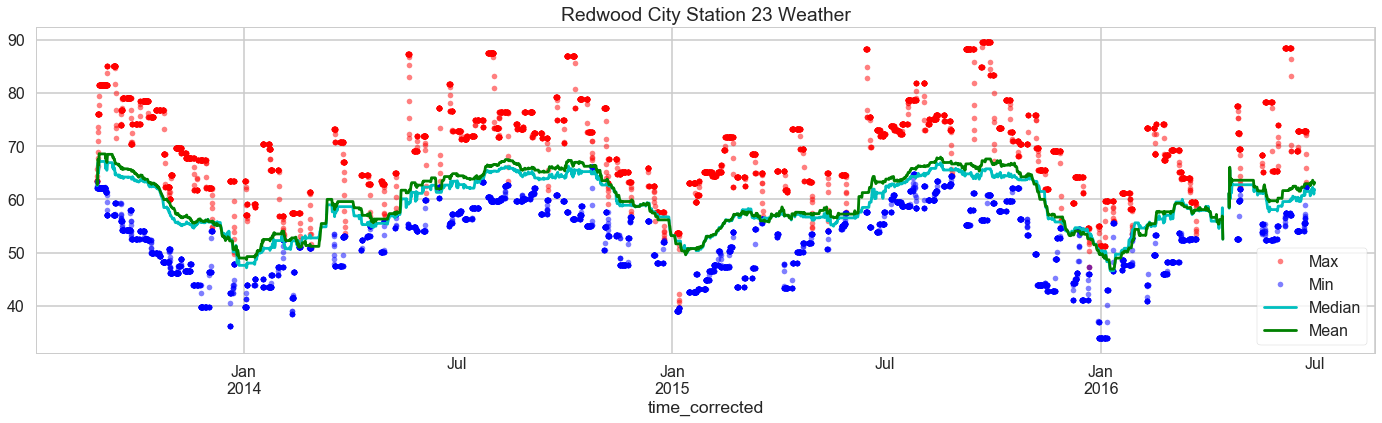

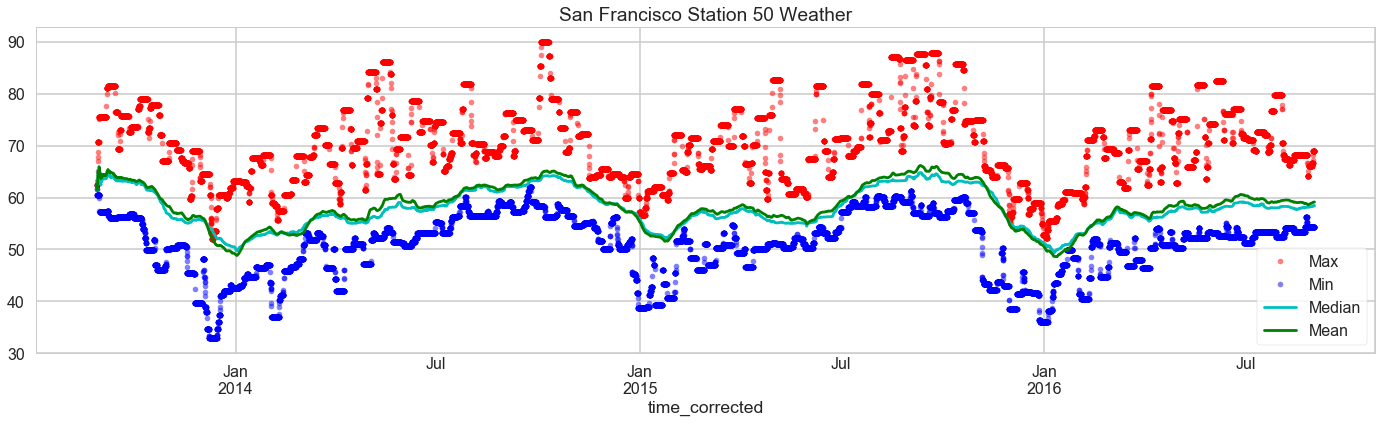

In [64]:
for sid in sorted(weather.station_id.unique()):
    
    df = weather[weather.station_id == sid].copy()
    df.sort_values('time_corrected', inplace=True)
    df.set_index('time_corrected', inplace=True)
    
    region = zip_to_landmark(df.zip_code.unique())
    
    df = df.resample('1H').mean()
    alpha = df.shape[0]/500000
    
    ax = df.rolling('7D').max().apparentTemperature.plot(linestyle='', marker='.', alpha=0.5, color='r', figsize=(24,6), label='Max')
    df.rolling('7D').min().apparentTemperature.plot(linestyle='', marker='.', alpha=0.5, color='b', ax=ax, label='Min')
    df.rolling('30D').median().apparentTemperature.plot(color='c', ax=ax, label='Median')
    df.rolling('30D').mean().apparentTemperature.plot(color='g', ax=ax, label='Mean')
    
    title = '%s Station %s Weather' % (region, sid)
    ax.set_title(title)
    ax.legend(loc=4, frameon=True)
    plt.show()
    plt.close()
    